In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.animation import FuncAnimation
import pandas as pd
#%matplotlib widget
#matplotlib.rcParams['toolbar'] = 'None' 

In [2]:
# restore the toolbar buttons
matplotlib.rcParams.update({})

In [3]:
def fun(x, y) :
    return (x ** 2) - (y ** 2)

def grad_fun_1(x, y):
    return 2 * x

def grad_fun_2(x, y) :
    return -2 * y

# def fun(x, y) :
#     return np.sin(np.sqrt(x**2 + y**2))

### Multivariate gradient descent — intuition
The bivariate (two variables) quadratic function, $ J(\theta_1, \theta_2) $, which we are going to perform - 
$$ J(\theta_1, \theta_2) = \theta_1^2 -  \theta_2^2 $$

The 3d surface plot of the function-

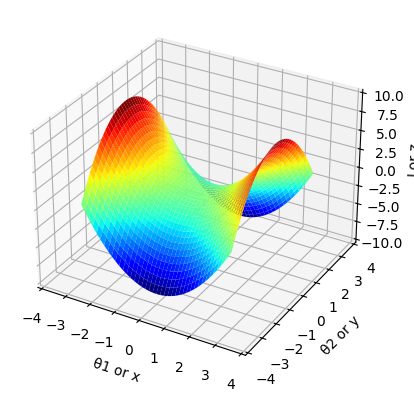

In [86]:
#3d plot
%matplotlib inline
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')
# ax_1.view_init(elev=30, azim=60) 
ax_1.set_ylim(-4, 4)
ax_1.set_xlim(-4, 4)
ax_1.set_zlim(-10, 10)
x1 = y1 = np.arange(-3.0, 3.0, 0.05)
X1, Y1 = np.meshgrid(x1, y1)
z1 = fun(X1, Y1)
ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet')
ax_1.set_xlabel('θ1 or x')
ax_1.set_ylabel('θ2 or y')
ax_1.set_zlabel('J or z')

fig_1.savefig('Cost_f.png')
plt.show()

When applying gradient descent to this function, our objective still remains the same, except that now we have two parameters, $ θ_1 $ and $ θ_2 $, to optimise:

$$ min_{\theta_1, \theta_2} J(\theta_1, \theta_2) $$

### Update rule
Another feature of gradient descent is that, it is an iterative algorithm. Therefore, it uses the update rule to systemically and efficiently update the values of parameters after each iteration.

This was the update rule for univariate gradient descent:

$$ \theta := \theta - \alpha \frac{d   J(\theta)}{d\theta} $$ 

Where $\alpha$ is the learning rate and $dJ(\theta)/d\theta$ is the derivative of $J(\theta)$ — i.e. the slope of a tangent line that touches the $J(\theta)$ at given $\theta$.

Now that we have two variables, we need to supply an update rule for each:

$$ \theta_1 := \theta_1 - \alpha \frac{\partial   J(\theta_1, \theta_2)}{\partial \theta_1} $$ 
$$ \theta_2 := \theta_2 - \alpha \frac{\partial   J(\theta_1, \theta_2)}{\partial \theta_2} $$ 

These equations look almost identical to the one for univariate functions. The only change here is the derivative term, $\partial J(\theta1, \theta2)/\partial \theta1$ and $\partial J(\theta1, \theta2)/\partial \theta2$.

### Partial derivative
Cosidering general cost function of -
$$ J(\theta_1, \theta_2) = \theta_1^2 +  \theta_2^2 $$

In partial derivatives, just as in normal derivatives, we are still interested in the slope of a tangent that touches $J(\theta1, \theta2)$ at given $\theta1$ or $\theta2$… but this or here is crucial.

Essentially, we cannot move both θ1 and θ2 at the same time when looking at a tangent. Therefore, we focus on only one variable at a time, whilst holding the other constant. Hence, the name partial.

Using graphs-

<img src="partial_d.png" alt="image.png" width="250"/>
Let’s consider $\theta1$ as a variable and keep $\theta2$ constant, in other words, a partial derivative of $\theta1$.

What keeping $\theta2$ constant visually translates to is a $\theta1-J(\theta1, \theta2)$ plane (Fig- blue square) cutting through the graph at a particular value of $\theta2$. The Fig red line represents the intersect between the $\theta1-J(\theta1, \theta2)$ plane and the $J(\theta1, \theta2)$ plot, which becomes the function of interest in the partial derivative.

Now, if we extract the blue plane along with the red line, what we end up is a good-old univariate function with θ1 as a parameter, on a 2D plane.

Therefore, we can calculate the partial derivate term in the update function as follows, as $\partial \theta1$ shrink towards zero:
<img src="partial_d_formula.png" alt="image.png" />

Now, cosider original cost function ,

$ J(\theta_1, \theta_2) = \theta_1^2 -  \theta_2^2$ -
$$
\frac{\partial J(\theta1, \theta2)}{\partial \theta_1} =  
\frac{\partial (\theta_1^2 -  \theta_2^2)}{\partial \theta_1} =
2 \theta_1$$

and,
$$
\frac{\partial J(\theta1, \theta2)}{\partial \theta_2} =  
\frac{\partial (\theta_1^2 -  \theta_2^2)}{\partial \theta_2} =
-2 \theta_2$$

### Simultaneous update
We can simplify update rules as follows:
$$ \theta_1 := \theta_1 - \alpha (2 \theta_1) = (1 - 2\alpha)\theta_1 $$ 
$$ \theta_2 := \theta_2 - \alpha (-2 \theta_2) = (1 + 2\alpha)\theta_2 $$ 

In [25]:
def plot_3d(theta1, theta2, J, label) :
    fig_1 = plt.figure()
    ax_1 = fig_1.add_subplot(111, projection = '3d')
    ax_1.view_init(elev=30, azim=60) 
    x1 = y1 = np.arange(-3, 3, 0.05)
    X1, Y1 = np.meshgrid(x1, y1)
    z1 = fun(X1, Y1)
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    ax_1.plot(theta1, theta2, J, linewidth=2, label = label)
    ax_1.plot(theta1[0], theta2[0], J[0], marker="o", markersize=10,markerfacecolor="black")
    ax_1.plot(theta1[-1], theta2[-1], J[-1], marker="o", markersize=10,markerfacecolor="white")
    plt.legend()
    ax_1.set_xlabel('θ1 or x')
    ax_1.set_ylabel('θ2 or y')
    ax_1.set_zlabel('J or z')
    ax_1.set_ylim(-4, 4)
    ax_1.set_xlim(-4, 4)
    ax_1.set_zlim(-10, 10)
    plt.show()
    
def plot_3d_dynamic(theta1, theta2, J, label, iterations) :
    fig_1 = plt.figure()
    ax_1 = fig_1.add_subplot(111, projection = '3d')
    ax_1.view_init(elev=30, azim=60) 
    x1 = y1 = np.arange(-3, 3, 0.05)
    X1, Y1 = np.meshgrid(x1, y1)
    z1 = fun(X1, Y1)
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    ax_1.plot(theta1[0], theta2[0], J[0], marker="o", markersize=10,markerfacecolor="black")
    # ax_1.plot(theta1[-1], theta2[-1], J[-1], marker="o", markersize=10,markerfacecolor="white")
    ax_1.set_xlabel('θ1 or x')
    ax_1.set_ylabel('θ2 or y')
    ax_1.set_zlabel('J or z')
    ax_1.set_ylim(-4, 4)
    ax_1.set_xlim(-4, 4)
    ax_1.set_zlim(-10, 10)
    plt.pause(1)
    #this just draws the line , prev line is overlapped
    for i in range(iterations):
        ax_1.cla()        
        ax_1.plot_surface(X1, Y1, z1, linewidth=0.2, antialiased=True, cmap='jet', alpha=0.5)
        ax_1.plot(theta1[:i+1], theta2[:i+1], J[:i+1], linewidth=2, label=label, c='red')
        ax_1.plot(theta1[0], theta2[0], J[0], marker="o", markersize=10,markerfacecolor="black")
        ax_1.plot(theta1[i], theta2[i], J[i], marker="o", markersize=10, markerfacecolor="white", markeredgecolor="red")
        ax_1.set_ylim(-4, 4)
        ax_1.set_xlim(-4, 4)
        ax_1.set_zlim(-10, 10)
        ax_1.set_xlabel('θ1 or x')
        ax_1.set_ylabel('θ2 or y')
        ax_1.set_zlabel('J or z')
        if i in [20, 50, 80] :
            fig_1.savefig(f'{label}_iter_{i}')
        plt.draw()
        plt.pause(0.01)

In [6]:
theta1 = 1
theta2 = 1e-6
alpha = 1e-1  #learning rate
theta1_hist = []
theta2_hist = []
J_hist = []
iterations = 150
for i in range(iterations) :
    theta1_hist.append(theta1)
    theta2_hist.append(theta2)
    J = fun(theta1, theta2)
    
    J_hist.append(J)
    theta1 = (1 - (2 * alpha))* theta1
    theta2 = (1 + (2 * alpha))* theta2  
   
    if i % 20 == 0:
        print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')

Iteration = 1 , theta1 = 0.8, theta2 = 1.2e-06, J = 0.999999999999
Iteration = 21 , theta1 = 0.009223372036854787, theta2 = 4.600511990936966e-05, J = 0.00013292132980692394
Iteration = 41 , theta1 = 0.0001063382396627935, theta2 = 0.0017637258815629004, J = -2.1425599913625156e-06
Iteration = 61 , theta1 = 1.2259964326927154e-06, theta2 = 0.06761701722379997, J = -0.0031750423714317776
Iteration = 81 , theta1 = 1.4134776518227139e-08, theta2 = 2.592274154412359, J = -4.666587008079383
Iteration = 101 , theta1 = 1.6296287810675988e-10, theta2 = 99.38156942641709, J = -6858.816903929
Iteration = 121 , theta1 = 1.87883406621908e-12, theta2 = 3810.050848536388, J = -10080894.075300591
Iteration = 141 , theta1 = 2.1661481985319047e-14, theta2 = 146068.20512309353, J = -14816611491.584812


In [88]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta1')
plt.plot(theta1_hist)
plt.show()

In [9]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta2')
plt.plot(theta2_hist)
plt.show()

In [10]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_hist)
plt.show()

In [104]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_hist, theta2=theta2_hist, J = J_hist, label = 'Vanilla GD')

In [26]:
#3d plot dynamic 
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_hist, theta2=theta2_hist, J = J_hist, label = 'Vanilla GD', iterations=iterations)

## Momentum
### Basically taking knowledge from previous steps about where we should be heading. We are introducing a new hyperparameter  μ
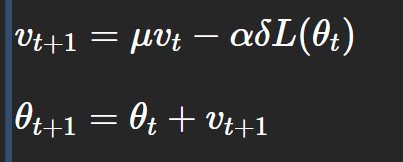

In [27]:
theta1 = 1
theta2 = 1e-6
alpha = 1e-1  #learning rate
mu = 0.95
v1 = 0
v2 = 0

theta1_momen_hist = []
theta2_momen_hist = []
J_momen_hist = []
for i in range(iterations) :
    theta1_momen_hist.append(theta1)
    theta2_momen_hist.append(theta2)
    J = fun(theta1, theta2)
    
    J_momen_hist.append(J)
    
    grad1 = grad_fun_1(theta1, theta2)
    grad2 = grad_fun_2(theta1, theta2)
    
    v1 = (mu * v1) - (alpha * grad1)
    v2 = (mu * v2) - (alpha * grad2)
    theta1 = theta1 + v1
    theta2 = theta2 + v2
   	
    if i % 20 == 0:
    	print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')

Iteration = 1 , theta1 = 0.8, theta2 = 1.2e-06, J = 0.999999999999
Iteration = 21 , theta1 = -0.5607457012399045, theta2 = 0.004720997991642322, J = 0.36341544441757334
Iteration = 41 , theta1 = 0.35456222053418807, theta2 = 22.861739898906407, J = -223.6136213216949
Iteration = 61 , theta1 = -0.20450987480589153, theta2 = 110709.46312101539, J = -5246406565.874843
Iteration = 81 , theta1 = 0.1068018980643506, theta2 = 536117779.25658935, J = -1.230305239070063e+17
Iteration = 101 , theta1 = -0.048840390807531206, theta2 = 2596185232339.5225, J = -2.885119485632593e+24
Iteration = 121 , theta1 = 0.017574051303838406, theta2 = 1.2572195926731106e+16, J = -6.765731122683487e+31
Iteration = 141 , theta1 = -0.0025916679123741543, theta2 = 6.0881676873910895e+19, J = -1.586593479140127e+39


In [13]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta1')
plt.plot(theta1_momen_hist)
plt.show()

In [14]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta2')
plt.plot(theta2_momen_hist)
plt.show()

In [15]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_momen_hist)
plt.show()

In [91]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_momen_hist, theta2=theta2_momen_hist, J=J_momen_hist, label = 'Momentum')

In [29]:
#3d plot dynamic 
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_momen_hist, theta2=theta2_momen_hist, J=J_momen_hist, label = 'Momentum', iterations = iterations)

## AdaGrad
### Adagrad scales alpha for each parameter according to the history of gradients (previous steps) for that parameter which is basically done by dividing current gradient in update rule by the sum of previous gradients. As a result, what happens is that when the gradient is very large, alpha is reduced and vice-versa.
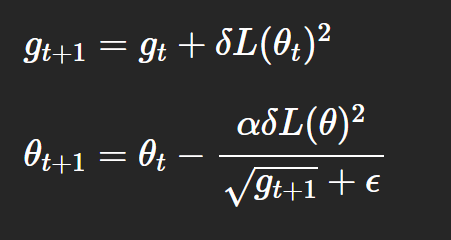

In [30]:
theta1 = 1
theta2 = 1e-6
eta = 1e-1  #learning rate
epsilon = 10e-8
cache1 = 0 #initial cache is implemented differently in different packages. EXPERIMENT
cache2 = 0

theta1_adagrad_hist = []
theta2_adagrad_hist = []
J_adagrad_hist = []

for i in range(iterations) :
    theta1_adagrad_hist.append(theta1)
    theta2_adagrad_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adagrad_hist.append(J)
    if i % 20 == 0 :
        print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')
    
    grad1 = grad_fun_1(theta1, theta2)
    grad2 = grad_fun_2(theta1, theta2)
    
    cache1 += grad1 ** 2
    cache2 += grad2 ** 2
    theta1 -=  eta * (grad1 / (np.sqrt(cache1 + epsilon)))
    theta2 -=  eta * (grad2 / (np.sqrt(cache2 + epsilon)))

Iteration = 1 , theta1 = 1, theta2 = 1e-06, J = 0.999999999999
Iteration = 21 , theta1 = 0.3765760164091392, theta2 = 1.0782878599144516, J = -1.0208952127043118
Iteration = 41 , theta1 = 0.19020929927136537, theta2 = 1.6351565343516976, J = -2.6375573143037507
Iteration = 61 , theta1 = 0.0991238155122844, theta2 = 2.0541029559744644, J = -4.20951342294132
Iteration = 81 , theta1 = 0.05204975131187901, theta2 = 2.404050110956326, J = -5.776747759377495
Iteration = 101 , theta1 = 0.027386882344743017, theta2 = 2.7106675148046904, J = -7.346968334492871
Iteration = 121 , theta1 = 0.014418139799137477, theta2 = 2.986843877573978, J = -8.921028466245888
Iteration = 141 , theta1 = 0.007591769178258393, theta2 = 3.2401305753592218, J = -10.498388510418424


In [22]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta1')
plt.plot(theta1_adagrad_hist)
plt.show()

In [23]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta2')

plt.plot(theta2_adagrad_hist)
plt.show()

In [24]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_adagrad_hist)
plt.show()

In [66]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adagrad_hist, theta2=theta2_adagrad_hist, J=J_adagrad_hist, label = 'AdaGrad')

In [32]:
#3d dynamic plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adagrad_hist, theta2=theta2_adagrad_hist, J=J_adagrad_hist, label = 'AdaGrad', iterations = iterations)

### RMSProp
### The only difference RMSProp has with Adagrad is that the  $g_t$ term is calculated by exponentially decaying average and not the sum of gradients.
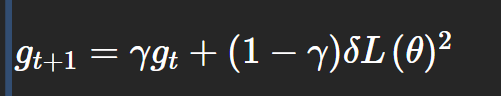

### Here $g_t$ is called the second order moment of $\delta L$. Additionally, a first order moment $m_t$ can also be introduced.

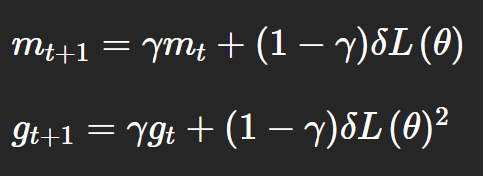

### Adding momentum as in the first case,

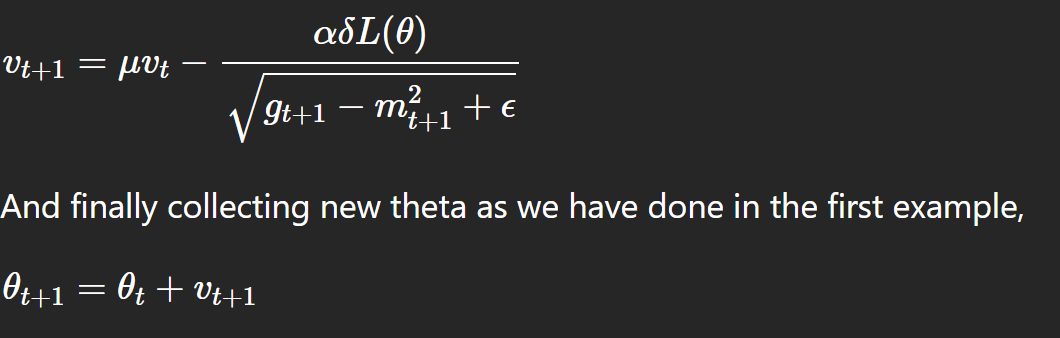

In [33]:
theta1 = 1
theta2 = 1e-6
eta = 1e-1  #learning rate
epsilon = 10e-8
g1 = 0 #initial cache is implemented differently in different packages. EXPERIMENT
g2 = 0
m1 = 0
m2 = 0
v1 = 0
v2 = 0
mu = 0.95

gamma = 0.95

theta1_rmsprop_hist = []
theta2_rmsprop_hist = []
J_rmsprop_hist = []

for i in range(iterations) :
    theta1_rmsprop_hist.append(theta1)
    theta2_rmsprop_hist.append(theta2)
    J = fun(theta1, theta2)
    J_rmsprop_hist.append(J)
    if i % 20 == 0:
        print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')
    
    grad1 = grad_fun_1(theta1, theta2)
    grad2 = grad_fun_2(theta1, theta2)
    
    m1 = (gamma * m1) + (1 - gamma) * grad1
    m2 = (gamma * m2) + (1 - gamma) * grad2
    
    g1 = (gamma * g1) + (1- gamma) * (grad1 ** 2)
    g2 = (gamma * g2) + (1- gamma) * (grad2 ** 2)
    
    v1 = (mu * v1) - ((eta * grad1) / (np.sqrt(g1 - (m1 ** 2) + epsilon)))
    v2 = (mu * v2) - ((eta * grad2) / (np.sqrt(g2 - (m2 ** 2) + epsilon)))
    
    theta1 +=  v1
    theta2 +=  v2

Iteration = 1 , theta1 = 1, theta2 = 1e-06, J = 0.999999999999
Iteration = 21 , theta1 = -0.4257730224556803, theta2 = 52.19236203286013, J = -2723.861371902489
Iteration = 41 , theta1 = 0.23880151013297443, theta2 = 146.97186635582452, J = -21600.672473953102
Iteration = 61 , theta1 = 0.1546143241650736, theta2 = 257.10886513413425, J = -66104.9446249732
Iteration = 81 , theta1 = 0.11389752178551986, theta2 = 384.04324870724184, J = -147489.20390496694
Iteration = 101 , theta1 = -0.03585656970634377, theta2 = 531.8234786091857, J = -282836.2111142814
Iteration = 121 , theta1 = 0.03318630390841722, theta2 = 702.3753531190298, J = -493331.135567751
Iteration = 141 , theta1 = -0.019603767685868596, theta2 = 895.5766427619754, J = -802057.5226765033


In [95]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta1')
plt.plot(theta1_rmsprop_hist)
plt.show()

In [32]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta2')

plt.plot(theta2_rmsprop_hist)
plt.show()

In [22]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_rmsprop_hist)
plt.show()

In [70]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_rmsprop_hist, theta2=theta2_rmsprop_hist, J=J_rmsprop_hist, label = 'RMSProp')

In [34]:
#3d dynamic plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_rmsprop_hist, theta2=theta2_rmsprop_hist, J=J_rmsprop_hist, label = 'RMSProp', iterations=iterations)

## AdaDelta
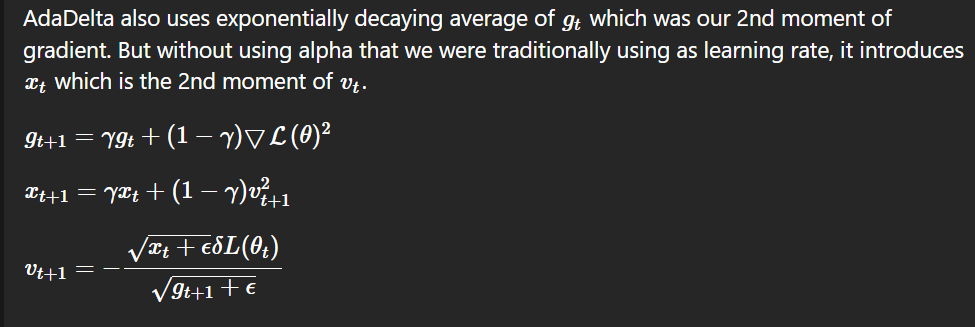

In [35]:
theta1 = 1
theta2 = 1e-6
eta = 1e-1  #learning rate
epsilon = 10e-8
g1 = 0 #initial cache is implemented differently in different packages. EXPERIMENT
g2 = 0
x1 = 0
x2 = 0
v1 = 1
v2 = 1
mu = 0.95

gamma = 0.95

theta1_adadelta_hist = []
theta2_adadelta_hist = []
J_adadelta_hist = []

for i in range(iterations) :
    theta1_adadelta_hist.append(theta1)
    theta2_adadelta_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adadelta_hist.append(J)
    if i % 20 == 0:
        print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')
    
    grad1 = grad_fun_1(theta1, theta2)
    grad2 = grad_fun_2(theta1, theta2)
    
    g1 = (gamma * g1) + (1- gamma) * (grad1 ** 2)
    g2 = (gamma * g2) + (1- gamma) * (grad2 ** 2)
    
    x1 = (gamma * x1) + (1 - gamma) * (v1 ** 2)
    x2 = (gamma * x2) + (1 - gamma) * (v2 ** 2)    
    
    v1 = (-np.sqrt(x1 + epsilon) * grad1) / (np.sqrt(g1 + epsilon))
    v2 = (-np.sqrt(x2 + epsilon) * grad2) / (np.sqrt(g2 + epsilon))
    
    theta1 +=  v1
    theta2 +=  v2

Iteration = 1 , theta1 = 1, theta2 = 1e-06, J = 0.999999999999
Iteration = 21 , theta1 = 9.175904588686592e-14, theta2 = 126.5908460466037, J = -16025.24230279492
Iteration = 41 , theta1 = 4.857873900514737e-21, theta2 = 1004.2465872721747, J = -1008511.2080478095
Iteration = 61 , theta1 = 2.5721806745064063e-28, theta2 = 4390.460939396052, J = -19276147.26036246
Iteration = 81 , theta1 = 1.3624424632846427e-35, theta2 = 14444.71492255208, J = -208649789.19379875
Iteration = 101 , theta1 = 7.22412476876556e-43, theta2 = 39925.47949185289, J = -1594043912.654366
Iteration = 121 , theta1 = 3.841565695510611e-50, theta2 = 97839.15471473282, J = -9572500195.293427
Iteration = 141 , theta1 = 2.0593592675138877e-57, theta2 = 219259.4505399917, J = -48074706651.09907


In [72]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adadelta_hist, theta2=theta2_adadelta_hist, J=J_adadelta_hist, label = 'AdaDelta')

In [36]:
#3d dynamic plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adadelta_hist, theta2=theta2_adadelta_hist, J=J_adadelta_hist, label = 'RMSProp', iterations=iterations)

### Adam
- It combines momentum with RMSProp.
- **Momentum** : 
	- $m_t = \beta_1 m_{t - 1} + (1 - \beta_1) g_t$, where $\beta_1$ is moment term or decay rate for momentum.
    - $\theta_t = \theta_{t - 1} - \eta m_t$.
    - $m_t$ estimates 1st moment of gradient using exponentially weighted average.
- **RMSProp** : 
	- $\nu_t = \beta_2 \nu_{t-1} + (1 - \beta_2) g_t^2$, where $\beta_2$ is RMS term or decay rate for RMS.
    - $\theta_t = \theta_{t - 1} - \eta \frac {g_t} {\sqrt{\nu_t} + \epsilon}$.
    - $\nu_t$ estimates 2nd moment of gradient using exponentially weighted average.
- **Together** :
$ \theta_t = \theta_{t-1} - \eta_ \frac{m_t} {\sqrt{\nu_t} + \epsilon}$.
- This still has a problem of bias *lagging* behind the input data near start of series.
- So, we have to employ **bias correction** , which states that instead of using $y(t)$, we adjust the values by some factor to get $\hat{y}(t)$:

	- $y(t) = \beta y (t - 1) + (1 - \beta) x(t)$
	- $\hat{y}(t) = \frac{y(t)} {1 - \beta^t}$
- Hence, when $t → \infty$, $\beta^t → 0$ [$\because \beta < 0$]

$\therefore \hat{y}(t) → y(t)$
- **Adam**
$\theta_t = \theta_{t-1} - \eta_ \frac{\hat{m}_t} {\sqrt{\hat{\nu}_t} + \epsilon}$

In [37]:
theta1 = 1
theta2 = 1e-6
eta = 1e-1  #learning rate
beta1 = 0.9  
beta2 = 0.999
epsilon = 1e-8
m1 = m2 = 0
nu1 = nu2 = 0

theta1_adam_hist = []
theta2_adam_hist = []
J_adam_hist = []

for i in range(iterations) :
    theta1_adam_hist.append(theta1)
    theta2_adam_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adam_hist.append(J)
    
    grad1 = grad_fun_1(theta1, theta2)
    grad2 = grad_fun_2(theta1, theta2)
    
    m1 = (beta1 * m1) + ((1 - beta1) * grad1)
    m2 = (beta1 * m2) + ((1 - beta1) * grad2)
    
    nu1 = (beta2 * nu1) + ((1 - beta2) * (grad1 ** 2))
    nu2 = (beta2 * nu2) + ((1 - beta2) * (grad2 ** 2))
    
    m_cap_1 = m1 / (1 - (beta1 ** (i + 1)))
    m_cap_2 = m2 / (1 - (beta1 ** (i + 1)))
    nu_cap_1 = nu1 / (1 - (beta2 ** (i + 1)))
    nu_cap_2 = nu2 / (1 - (beta2 ** (i + 1)))
    
    theta1 -= eta * m_cap_1 / (np.sqrt(nu_cap_1) + epsilon)
    theta2 -= eta * m_cap_2 / (np.sqrt(nu_cap_2) + epsilon)
    if i % 20 == 0:
        print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')

Iteration = 1 , theta1 = 0.9000000005, theta2 = 0.09950348756218906, J = 0.999999999999
Iteration = 21 , theta1 = -0.26270104107937003, theta2 = 2.119557927712941, J = -3.9401536521519915
Iteration = 41 , theta1 = 0.09624812418160963, theta2 = 4.68515439920136, J = -20.6690721892141
Iteration = 61 , theta1 = -0.030031735145516894, theta2 = 7.587033464989613, J = -55.29880704514663
Iteration = 81 , theta1 = 0.0026557154311987402, theta2 = 10.683534410415952, J = -110.78777683204628
Iteration = 101 , theta1 = 0.003499332103622406, theta2 = 13.890128161810118, J = -188.45841949462596
Iteration = 121 , theta1 = -0.0013107362175793973, theta2 = 17.1596274173911, J = -288.8343281041526
Iteration = 141 , theta1 = -0.00032391203757075275, theta2 = 20.465297936443424, J = -412.06680509676363


In [35]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta1')
plt.plot(theta1_adam_hist)
plt.show()

In [38]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('theta2')
plt.plot(theta2_adam_hist)
plt.show()

In [39]:
#%matplotlib inline
matplotlib.use('TkAgg')
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_adam_hist)
plt.show()

In [38]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adam_hist, theta2=theta2_adam_hist, J=J_adam_hist, label = 'Adam')

In [38]:
#3d plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adam_hist, theta2=theta2_adam_hist, J=J_adam_hist, label = 'Adam', iterations=iterations)

## AdamW

In [39]:
theta1 = 1
theta2 = 1e-6
eta = 1e-1  # Learning rate
beta1 = 0.9  
beta2 = 0.999
epsilon = 1e-8
m1 = m2 = 0
nu1 = nu2 = 0
weight_decay = 1  # Weight decay factor

# History lists
theta1_adamw_hist = []
theta2_adamw_hist = []
J_adamw_hist = []

for i in range(iterations):
    theta1_adamw_hist.append(theta1)
    theta2_adamw_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adamw_hist.append(J)
    
    grad1 = grad_fun_1(theta1, theta2) + weight_decay * theta1
    grad2 = grad_fun_2(theta1, theta2) + weight_decay * theta2
    
    m1 = (beta1 * m1) + ((1 - beta1) * grad1)
    m2 = (beta1 * m2) + ((1 - beta1) * grad2)
    nu1 = (beta2 * nu1) + ((1 - beta2) * (grad1 ** 2))
    nu2 = (beta2 * nu2) + ((1 - beta2) * (grad2 ** 2))
    
    m_cap_1 = m1 / (1 - (beta1 ** (i + 1)))
    m_cap_2 = m2 / (1 - (beta1 ** (i + 1)))
    nu_cap_1 = nu1 / (1 - (beta2 ** (i + 1)))
    nu_cap_2 = nu2 / (1 - (beta2 ** (i + 1)))
    
    theta1 -= eta * m_cap_1 / (np.sqrt(nu_cap_1) + epsilon)
    theta2 -= eta * m_cap_2 / (np.sqrt(nu_cap_2) + epsilon)
    
    if i % 20 == 0:
        print(f'Iteration = {i + 1}, theta1 = {theta1}, theta2 = {theta2}, J = {J}')


Iteration = 1, theta1 = 0.9000000003333333, theta2 = 0.09901090099009902, J = 0.999999999999
Iteration = 21, theta1 = -0.2627010412539036, theta2 = 2.118899882108648, J = -3.9375177320616084
Iteration = 41, theta1 = 0.09624812415068267, theta2 = 4.684552806822417, J = -20.66356230959234
Iteration = 61, theta1 = -0.030031734672546398, theta2 = 7.586524050464043, J = -55.2911618210768
Iteration = 81, theta1 = 0.0026557149127929857, theta2 = 10.683112699509929, J = -110.77881331256172
Iteration = 101, theta1 = 0.0034993322817960886, theta2 = 13.889781126731018, J = -188.44879777206515
Iteration = 121, theta1 = -0.0013107361431129853, theta2 = 17.15934199756159, J = -288.8245315482313
Iteration = 141, theta1 = -0.000323912087381546, theta2 = 20.465063057706367, J = -412.0571760470626


In [48]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adamw_hist, theta2=theta2_adamw_hist, J=J_adamw_hist, label = 'AdamW')

In [40]:
#3d plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adamw_hist, theta2=theta2_adamw_hist, J=J_adamw_hist, label = 'AdamW', iterations=iterations)

In [42]:
#3d plot dynamic - comparison
matplotlib.use('TkAgg')
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')
ax_1.view_init(elev=30, azim=60) 

x1 = y1 = np.arange(-3, 3, 0.05)
X1, Y1 = np.meshgrid(x1, y1)
#ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
#ax_1.plot(theta1_momen_hist[0], theta2_momen_hist[0], J_momen_hist[0], marker="o", markersize=10,markerfacecolor="black")
#ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=10,markerfacecolor="white")

z1 = fun(X1, Y1)
convergence = {
    'Momentum': None,
    'Vanilla GD': None,
    'AdaGrad': None,
    'RMSProp': None,
    'AdaDelta': None,
    'Adam': None,
    'AdamW': None
}

#this just draws the line , prev line is overlapped
for i in range(iterations):
    ax_1.cla()
    ax_1.set_xlim(-3, 3)
    ax_1.set_ylim(-3, 3)
    ax_1.set_zlim(-10, 10)
    
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    
    #momentum
    ax_1.plot(theta1_momen_hist[0], theta2_momen_hist[0], J_momen_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_momen_hist) :
        ax_1.plot(theta1_momen_hist[:i], theta2_momen_hist[:i], J_momen_hist[:i], linewidth=2, label = 'Momentum', c = 'red')
        ax_1.plot(theta1_momen_hist[i], theta2_momen_hist[i], J_momen_hist[i], marker="o", markersize=10,markerfacecolor="red", markeredgecolor='red')
        if J_momen_hist[i] < -7.5 and convergence['Momentum'] is None:
                convergence['Momentum'] = i
    else:
        ax_1.plot(theta1_momen_hist, theta2_momen_hist, J_momen_hist, linewidth=2, label = 'Momentum', c = 'red')
        ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=10,markerfacecolor="red", markeredgecolor='red')
        
    
    #vanilla GD
    ax_1.plot(theta1_hist[0], theta2_hist[0], J_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_hist[-1], theta2_hist[-1], J_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_hist) :
        ax_1.plot(theta1_hist[:i], theta2_hist[:i], J_hist[:i], linewidth=2, label = 'Vanilla GD', c = 'gray')
        ax_1.plot(theta1_hist[i], theta2_hist[i], J_hist[i], marker="o", markersize=10,markerfacecolor="gray", markeredgecolor='gray')
        if J_hist[i] < -7.5 and convergence['Vanilla GD'] is None:
                convergence['Vanilla GD'] = i
    else :
        ax_1.plot(theta1_hist, theta2_hist, J_hist, linewidth=2, label = 'Vanilla GD', c = 'gray')
        ax_1.plot(theta1_hist[-1], theta2_hist[-1], J_hist[-1], marker="o", markersize=10,markerfacecolor="gray", markeredgecolor='gray')
        
        
    #adagrad
    color_adagrad = 'blue'
    ax_1.plot(theta1_adagrad_hist[0], theta2_adagrad_hist[0], J_adagrad_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adagrad_hist[-1], theta2_adagrad_hist[-1], J_adagrad_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adagrad_hist) :
        ax_1.plot(theta1_adagrad_hist[:i], theta2_adagrad_hist[:i], J_adagrad_hist[:i], linewidth=2, label = 'AdaGrad', c = color_adagrad)
        ax_1.plot(theta1_adagrad_hist[i], theta2_adagrad_hist[i], J_adagrad_hist[i], marker="o", markersize=10,markerfacecolor=color_adagrad, markeredgecolor=color_adagrad)
        if J_adagrad_hist[i] < -7.5 and convergence['AdaGrad'] is None:
                convergence['AdaGrad'] = i
    else :
        ax_1.plot(theta1_adagrad_hist, theta2_adagrad_hist, J_adagrad_hist, linewidth=2, label = 'AdaGrad', c = color_adagrad)
        ax_1.plot(theta1_adagrad_hist[-1], theta2_adagrad_hist[-1], J_adagrad_hist[-1], marker="o", markersize=10,markerfacecolor=color_adagrad, markeredgecolor=color_adagrad)
    
    #rmsprop
    color_rmsprop = 'cyan'
    ax_1.plot(theta1_rmsprop_hist[0], theta2_rmsprop_hist[0], J_rmsprop_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_rmsprop_hist[-1], theta2_rmsprop_hist[-1], J_rmsprop_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_rmsprop_hist) :
        ax_1.plot(theta1_rmsprop_hist[:i], theta2_rmsprop_hist[:i], J_rmsprop_hist[:i], linewidth=2, label = 'RMSProp', c = color_rmsprop)
        ax_1.plot(theta1_rmsprop_hist[i], theta2_rmsprop_hist[i], J_rmsprop_hist[i], marker="o", markersize=10,markerfacecolor=color_rmsprop, markeredgecolor=color_rmsprop)
        if J_rmsprop_hist[i] < -7.5 and convergence['RMSProp'] is None:
                convergence['RMSProp'] = i
    else :
        ax_1.plot(theta1_rmsprop_hist, theta2_rmsprop_hist, J_rmsprop_hist, linewidth=2, label = 'RMSProp', c = color_rmsprop)
        ax_1.plot(theta1_rmsprop_hist[-1], theta2_rmsprop_hist[-1], J_rmsprop_hist[-1], marker="o", markersize=10,markerfacecolor=color_rmsprop, markeredgecolor=color_rmsprop)
    
    #adadelta
    color_adadelta = 'green'
    ax_1.plot(theta1_adadelta_hist[0], theta2_adadelta_hist[0], J_adadelta_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adadelta_hist[-1], theta2_adadelta_hist[-1], J_adadelta_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adadelta_hist) :
        ax_1.plot(theta1_adadelta_hist[:i], theta2_adadelta_hist[:i], J_adadelta_hist[:i], linewidth=2, label = 'AdaDelta', c = color_adadelta)
        ax_1.plot(theta1_adadelta_hist[i], theta2_adadelta_hist[i], J_adadelta_hist[i], marker="o", markersize=10,markerfacecolor=color_adadelta, markeredgecolor=color_adadelta)
        if J_adadelta_hist[i] < -7.5 and convergence['AdaDelta'] is None:
                convergence['AdaDelta'] = i
    else :
        ax_1.plot(theta1_adadelta_hist, theta2_adadelta_hist, J_adadelta_hist, linewidth=2, label = 'AdaDelta', c = color_adadelta)
        ax_1.plot(theta1_adadelta_hist[-1], theta2_adadelta_hist[-1], J_adadelta_hist[-1], marker="o", markersize=10,markerfacecolor=color_adadelta, markeredgecolor=color_adadelta)
        
    #adam
    color_adam = 'orange'
    ax_1.plot(theta1_adam_hist[0], theta2_adam_hist[0], J_adam_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adam_hist[-1], theta2_adam_hist[-1], J_adam_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adam_hist) :
        ax_1.plot(theta1_adam_hist[:i], theta2_adam_hist[:i], J_adam_hist[:i], linewidth=2, label = 'Adam', c = color_adam)
        ax_1.plot(theta1_adam_hist[i], theta2_adam_hist[i], J_adam_hist[i], marker="o", markersize=10,markerfacecolor=color_adam, markeredgecolor=color_adam)
        if J_adam_hist[i] < -7.5 and convergence['Adam'] is None:
                convergence['Adam'] = i
    else :
        ax_1.plot(theta1_adam_hist, theta2_adam_hist, J_adam_hist, linewidth=2, label = 'Adam', c = color_adam)
        ax_1.plot(theta1_adam_hist[-1], theta2_adam_hist[-1], J_adam_hist[-1], marker="o", markersize=10,markerfacecolor=color_adam, markeredgecolor=color_adam)
        
        
    #adamw
    color_adamw = 'chocolate'
    ax_1.plot(theta1_adamw_hist[0], theta2_adamw_hist[0], J_adamw_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adamw_hist[-1], theta2_adamw_hist[-1], J_adamw_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adamw_hist) :
        ax_1.plot(theta1_adamw_hist[:i], theta2_adamw_hist[:i], J_adamw_hist[:i], linewidth=2, label = 'AdamW', c = color_adamw)
        ax_1.plot(theta1_adamw_hist[i], theta2_adamw_hist[i], J_adamw_hist[i], marker="o", markersize=10,markerfacecolor=color_adamw, markeredgecolor=color_adamw)
        if J_adamw_hist[i] < -7.5 and convergence['AdamW'] is None:
                convergence['AdamW'] = i
    else :
        ax_1.plot(theta1_adamw_hist, theta2_adamw_hist, J_adamw_hist, linewidth=2, label = 'AdamW', c = color_adamw)
        ax_1.plot(theta1_adamw_hist[-1], theta2_adamw_hist[-1], J_adamw_hist[-1], marker="o", markersize=10,markerfacecolor=color_adamw, markeredgecolor=color_adamw)
        

    ax_1.set_xlabel('θ1 or x')
    ax_1.set_ylabel('θ2 or y')
    ax_1.set_zlabel('J or z')
    plt.legend()
    if i in [10, 20, 30] :
        fig_1.savefig(f'3d_compare_iter_{i}.png')
    plt.draw()
    plt.pause(0.01)

In [56]:
compare_df = pd.DataFrame(convergence.values(), columns=['Iteration'], index=convergence.keys()).sort_values(by='Iteration')
compare_df

,Iteration
AdaDelta,4
RMSProp,5
Adam,27
AdamW,27
Momentum,37
Vanilla GD,82
AdaGrad,102


In [58]:
print(compare_df.to_latex())

\begin{tabular}{lr}
\toprule
 & Iteration \\
\midrule
AdaDelta & 4 \\
RMSProp & 5 \\
Adam & 27 \\
AdamW & 27 \\
Momentum & 37 \\
Vanilla GD & 82 \\
AdaGrad & 102 \\
\bottomrule
\end{tabular}



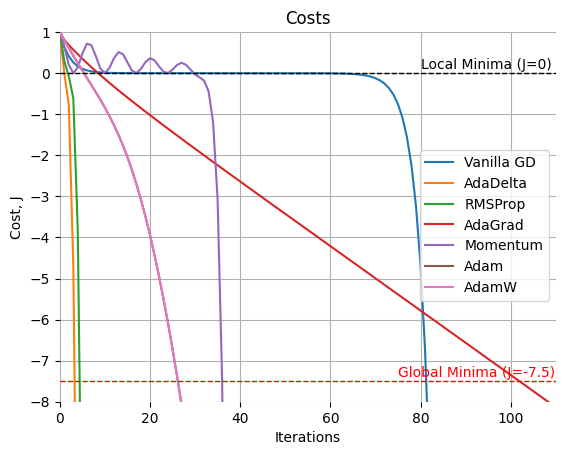

In [84]:
%matplotlib inline
# matplotlib.use('TkAgg')
fig = plt.figure()
plt.title('Costs')
plt.xlabel('Iterations')
plt.ylabel('Cost, J')
plt.xlim(0, 110)
plt.ylim(-8, 1)
plt.plot(J_hist, label = 'Vanilla GD')
plt.plot(J_adadelta_hist, label = 'AdaDelta')
plt.plot(J_rmsprop_hist, label = 'RMSProp')
plt.plot(J_adagrad_hist, label =  'AdaGrad')
plt.plot(J_momen_hist, label = 'Momentum')
plt.plot(J_adam_hist, label = 'Adam')
plt.plot(J_adamw_hist, label = 'AdamW')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-7.5, color='red', linestyle='--', linewidth=1)
plt.text(80, 0.2, 'Local Minima (J=0)', va='center', ha='left', color='black')
plt.text(75, -7.3, 'Global Minima (J=-7.5)', va='center', ha='left', color='red')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.7))
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
fig.savefig('cost_compare.png', bbox_inches='tight', transparent=True)
plt.show()